In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv('yelp_review.csv')

/Users/sues/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


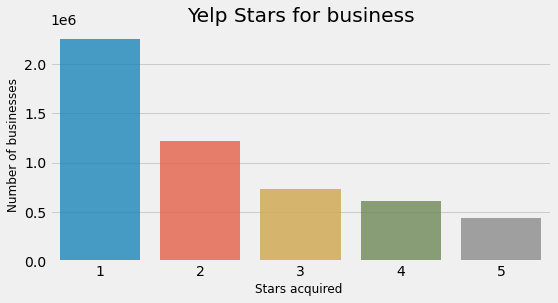

In [3]:
import matplotlib.pyplot as plt

x=df['stars'].value_counts()
y=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);

Since I wanted to make it simple binary classifcation problem with positive i.e, high polarity(stars= 4 and 5) and negative(stars= 1 and 2) labels I have converted stars column as binary column. We can keep neutral class as stars =3 but right now i am not dealing with that for sake of simplicity.

In [4]:
reviews=df[:300000]
reviews=reviews[reviews.stars!=3]

reviews["labels"]= reviews["stars"].apply(lambda x: 1 if x > 3  else 0)
reviews=reviews.drop("stars",axis=1)

reviews.head()

,review_id,user_id,business_id,date,text,useful,funny,cool,labels
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,1
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,Small unassuming place that changes their menu...,0,0,0,1
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,1
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,1
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,1


### Spacy
- spaCy is an industrial-strength natural language processing (NLP) library for Python. spaCy's goal is to take recent advancements in natural language processing out of research papers and put them in the hands of users to build production software.

- spaCy handles many tasks commonly associated with building an end-to-end natural language processing pipeline:

**Tokenization** 
- Text normalization, such as lowercasing, stemming/lemmatization
- Part-of-speech tagging
- Syntactic dependency parsing
- Sentence boundary detection


In [6]:
import spacy

In [7]:
nlp = spacy.load("en_core_web_sm")
sample_review=reviews.text[6]
sample_review

"Who would have guess that you would be able to get fairly decent Vietnamese restaurant in East York? \n\nNot quite the same as Chinatown in terms of pricing (slightly higher) but definitely one of the better Vietnamese restaurants outside of the neighbourhood. When I don't have time to go to Chinatown, this is the next best thing as it is down the street from me.\n\nSo far the only items I have tried are the phos (beef, chicken & vegetarian) - and they have not disappointed me! Especially the chicken pho.\n\nNext time I go back, I'm going to try the banh cuon (steamed rice noodle) and the vermicelli!"

In [8]:
%%time
parsed_review = nlp(sample_review)
print(parsed_review)

Who would have guess that you would be able to get fairly decent Vietnamese restaurant in East York? 

Not quite the same as Chinatown in terms of pricing (slightly higher) but definitely one of the better Vietnamese restaurants outside of the neighbourhood. When I don't have time to go to Chinatown, this is the next best thing as it is down the street from me.

So far the only items I have tried are the phos (beef, chicken & vegetarian) - and they have not disappointed me! Especially the chicken pho.

Next time I go back, I'm going to try the banh cuon (steamed rice noodle) and the vermicelli!
CPU times: user 33.3 ms, sys: 7.2 ms, total: 40.5 ms
Wall time: 38.4 ms


Sentence detection and segmentation

In [9]:
for num, sentence in enumerate(parsed_review.sents):
    print ('Sentence {}:'.format(num + 1))
    print (sentence)
    print ('\n')

Sentence 1:
Who would have guess that you would be able to get fairly decent Vietnamese restaurant in East York? 




Sentence 2:
Not quite the same as Chinatown in terms of pricing (slightly higher) but definitely one of the better Vietnamese restaurants outside of the neighbourhood.


Sentence 3:
When I don't have time to go to Chinatown, this is the next best thing as it is down the street from me.




Sentence 4:
So far the only items I have tried are the phos (beef, chicken & vegetarian) - and they have not disappointed me!


Sentence 5:
Especially the chicken pho.




Sentence 6:
Next time I go back, I'm going to try the banh cuon (steamed rice noodle) and the vermicelli!




Named entity detection

In [10]:
for num, entity in enumerate(parsed_review.ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('\n')

Entity 1: Vietnamese - NORP


Entity 2: East York - GPE


Entity 3: Vietnamese - NORP




Part of speech tagging

In [11]:
token_text = [token.orth_ for token in parsed_review]
token_pos = [token.pos_ for token in parsed_review]

parts_of_speech=pd.DataFrame(data=list(zip(token_text, token_pos)),columns=['token_text', 'part_of_speech'])
parts_of_speech.head(10)

,token_text,part_of_speech
0,Who,PRON
1,would,VERB
2,have,AUX
3,guess,VERB
4,that,SCONJ
5,you,PRON
6,would,VERB
7,be,AUX
8,able,ADJ
9,to,PART


**Text normalization, like stemming/lemmatization and shape analysis**


The work at this stage attempts to reduce as many different variations of similar words into a single term ( different branches all reduced to single word stem). Therefore if we have "running", "runs" and "run", you would really want these three distinct words to collapse into just the word "run". (However of course you lose granularity of the past, present or future tense).

In [12]:
token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

text_normalized_DF=pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])
text_normalized_DF.head()

,token_text,token_lemma,token_shape
0,Who,who,Xxx
1,would,would,xxxx
2,have,have,xxxx
3,guess,guess,xxxx
4,that,that,xxxx


Token-level entity analysis

In [13]:
token_entity_type = [token.ent_type_ for token in parsed_review]
token_entity_iob = [token.ent_iob_ for token in parsed_review]

entity_analysis=pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob)),
             columns=['token_text', 'entity_type', 'inside_outside_begin'])
entity_analysis.head()

,token_text,entity_type,inside_outside_begin
0,Who,,O
1,would,,O
2,have,,O
3,guess,,O
4,that,,O


**Token attributes**,
such as the relative frequency of tokens, and whether or not a token matches any of these categories

stopword punctuation whitespace represents a number whether or not the token is included in spaCy's default vocabulary?

In [14]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_review]

token_attributes = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

token_attributes.loc[:, 'stop?':'out of vocab.?'] = (token_attributes.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
token_attributes.head()


,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,Who,-20.0,Yes,,,,Yes
1,would,-20.0,Yes,,,,Yes
2,have,-20.0,Yes,,,,Yes
3,guess,-20.0,,,,,Yes
4,that,-20.0,Yes,,,,Yes


## Matchers

Matchers help you find and extract information from Doc objects based on match patterns describing the sequences you’re looking for. A matcher operates on a Doc and gives you access to the matched tokens in context.

The PhraseMatcher lets you efficiently match large terminology lists. While the Matcher lets you match sequences based on lists of token descriptions, the PhraseMatcher accepts match patterns in the form of Doc objects. 

In [15]:
keywords = ["good", "place","food", "like","great","one","service","back","nice","dont",
           "well","love","didnt","always","order","time","never","people","really","best",
           "friendly","delicious","staff","amazing","first"]

In [16]:
from spacy.matcher import PhraseMatcher


In [17]:
nlp1 = spacy.blank('en')

In [18]:
# Create the PhraseMatcher object. The tokenizer is the first argument. Use attr = 'LOWER' to make consistent capitalization
matcher = PhraseMatcher(nlp1.vocab, attr='LOWER')

# Create a list of tokens for each item in the menu
review_tokens_list = [nlp1(reviews) for reviews in keywords]

# Add the item patterns to the matcher. 


matcher.add("Search Keywords",            # Just a name for the set of rules we're matching to
            review_tokens_list  
           )

In [19]:
from collections import defaultdict

In [21]:
# item_ratings is a dictionary of lists. If a key doesn't exist in item_ratings,
# the key is added with an empty list as the value.
keywords_ratings = defaultdict(list)

for idx, review in df.iterrows():
    doc = nlp1(review.text)
    # Using the matcher from the previous cell
    matches = matcher(doc)
    
    # Create a set of the items found in the review text
    found_keywords = set(list([doc[match[1]:match[2]].lower_ for match in matches ]))
    
    # Update item_ratings with rating for each item in found_items
    # Transform the item strings to lowercase to make it case insensitive
    for keywords in found_keywords:
        keywords_ratings[keywords].append(review.stars)

In [22]:
# Calculate the mean ratings for each review-word item as a dictionary
mean_ratings = {keywords: sum(ratings)/len(ratings) for keywords, ratings in keywords_ratings.items()}

# Find the worst item, and write it as a string in worst_keywords. This can be multiple lines of code if you want.
worst_keyword = sorted(mean_ratings, key=mean_ratings.get)[0]

print(worst_keyword)
print(mean_ratings[worst_keyword])

do nt
1.5


In [26]:
counts = {keywords: len(ratings) for keywords, ratings in keywords_ratings.items()}

keywords_counts = sorted(counts, key=counts.get, reverse=True)
    

sorted_ratings = sorted(mean_ratings, key=mean_ratings.get)

print("The worst rated review keywords:")
for keywords in sorted_ratings[:10]:
    print(f"{keywords:20} Ave rating: {mean_ratings[keywords]:.2f} \tcount: {counts[keywords]}")
    
print("The best rated review keywords:")
for keywords in sorted_ratings[-10:]:
    print(f"{keywords:20} Ave rating: {mean_ratings[keywords]:.2f} \tcount: {counts[keywords]}")

The worst rated review keywords:
do nt                Ave rating: 1.50 	count: 4
did nt               Ave rating: 1.92 	count: 12
didnt                Ave rating: 2.80 	count: 27027
dont                 Ave rating: 2.99 	count: 38693
never                Ave rating: 3.08 	count: 634314
order                Ave rating: 3.26 	count: 564942
people               Ave rating: 3.34 	count: 598865
like                 Ave rating: 3.45 	count: 1326832
one                  Ave rating: 3.45 	count: 1250119
back                 Ave rating: 3.51 	count: 1239571
The best rated review keywords:
well                 Ave rating: 3.77 	count: 776458
nice                 Ave rating: 3.82 	count: 805223
staff                Ave rating: 3.93 	count: 720203
always               Ave rating: 4.12 	count: 648239
great                Ave rating: 4.21 	count: 1667893
friendly             Ave rating: 4.24 	count: 733374
best                 Ave rating: 4.26 	count: 788493
love                 Ave rating: 4.29 	co